# HW4:Hash Table

### 又到了前言的時刻了哇哈哈
這次的作業HW4相較HW3，比起來根本是天堂阿!

只要學期剛開始有寫linked list，這次作業只要依照之前的想法做就好。

這次比較難的部分在於一開始對Hash Table的理解與Debug的部分，

關於遇到的困難會在下面補充。

## Hash function
Hash function又叫做雜湊函式，是一種用來加密的方法，

老師上課說過，就像是每個人都有自己專屬的身分證字號，

每串文字甚至是一個字，只要經過hash function加密後，出來的東西只會是唯一。

一方面是用來將文字轉換成另一個形式，另一方面更是為了防止在做資料區分的時候，去與其他不同的資料作辨別。

這裡是用MD5去做轉換，並把轉成16進位的結果再轉為10進位。

## Hash table
Hash table又叫雜湊表，

當文字經過hash function去加密之後，為了在眾多資料中容易找尋，

我們可以將加密後的結果以某種特定的規則去做放入與排列的步驟，

這樣當我們在找尋某個資料的時候就可以依照特定的規則去尋找，

不需要把全部資料都看一次後才找的到要找的資料。

就像這裡是把10進位轉出來的結果去取除以5的餘數，也就是程式碼中的%5，

依照此餘數決定該結果該放置的位置，這樣下次要找資料的時候只要在這個位子去尋找就好。

例如假如elephant轉換完後去除以5會於1，那麼我下次要在眾多資料中找elephant只需要在餘數=1的那一條linked list中尋找，就會找到，

節省了把全部資料看過的時間與過程。

## 學習歷程:
這次的程式碼總共有add、remove、contains，

我一開始決定的順序是先寫contain再寫add，

最後再處理remove，

因為看起來contain、add比較簡單，

但當我剛開始想contains的時候想到我忘記寫最重要的hash function，

所以我先開始想了hash，


### Hash
我的想法是把投影片上附上的那段程式碼寫成一個def，

並在add、remove、contain中呼叫，去把key從字串轉成數字，

以下是我處理Hash的程式碼

In [2]:
from Cryptodome.Hash import MD5
h=MD5.new()
h.update('elephant'.encode('utf-8'))
print(int(h.hexdigest(),16))

h.update('father'.encode('utf-8'))
print(int(h.hexdigest(),16))

304001513754002991427039669781070276751
164561655757607899812286407172967591159


In [3]:
h=MD5.new()
h.update('elephant'.encode('utf-8'))
print(int(h.hexdigest(),16))

h=MD5.new()
h.update('father'.encode('utf-8'))
print(int(h.hexdigest(),16))

h=MD5.new()
h.update('elephantfather'.encode('utf-8'))
print(int(h.hexdigest(),16))

304001513754002991427039669781070276751
18491589353818768492867132848481966701
164561655757607899812286407172967591159


這裡我先利用投影片上的程式碼去測試我Hash中應該要有的程式碼，

我發現在每次要update之前都必須先建一個new的空間，

否則會把加入的所有字串連接成一整長串字串，就像字詞連成一個句子一樣，

由上面的程式碼可以發現，

在一開始我先假設不用每次都建立一個new空間，轉出來的數字如下；

而我在比對每次都有MD5.new()的結果，發現到，

沒有每次輸入MD5.new()時我輸入elephant、father的數字會直接跟elephantfather一樣，

由此可知，我必須在每次呼叫我的Hash時，裡面也要呼叫MD5.new()這句程式碼。

In [4]:
def Hash(self, key):
    h = MD5.new()
    h.update(key.encode('utf-8'))
    new_key=int(h.hexdigest(),16)
    return new_key

以上是我Hash的程式碼，

在轉成數字後要回傳那串數字。

### Contains
這裡先選擇寫contains是因為contains只要走訪，

一開始先設定是self.data中的哪個元素為頭進行走訪，

如果遇到一樣等於key轉換出來的數字就return True，

而走訪的過程在之前linked list、BST這些作業都有寫過了，

所以這次也很直接的就打得出來。

以下為程式碼:

In [6]:
def contains(self, key):
    """
    :type key: str
    :rtype: bool(True or False)
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head=self.data[index]
    while node_head != None:
        if node_head.val == key_int:
            return True
        else:
            node_head = node_head.next
    else:
        return False

這裡我是以head本身去和int_key比對，

如果head.val不等於int_key(key轉換成數字後的結果)，就往下找(head=head.next)

當我找到最後一個，也就是head.next=None時，我還找不到，那麼我的head=head.next就會把head變成None，

這時候會跳出while迴圈，直接return False，表示我已經走訪過所有但找不到我要搜尋的key。

### Add
在add這裡我寫的方法是重複放入，如果有重複值就一樣加到linked list的最後面，

因為那時候寫完的時候QA還沒有這個問題，不然感覺不用重複刪除比較簡單哈哈哈。

在最後面我會補充上重複值就不放入的程式碼。

這裡一開始也是用self.data[index]去找是以self.data中的哪裡當linked list的頭，

找到之後再以linked list的方法寫入add，

我的想法是，一開始會有兩個狀況:

1. head = None，這時候直接新建一個ListNode(key_int)並放在head的位置

2. head != None，這時候就必須用走訪的方式去找到linked list中的最後一個node，並把新建的ListNode(key_int)定為最後一個node.next

程式碼如下(完整測試的是比較下面的那個，上面的只是一開始的構想):

In [7]:
def add(self, key):
    """
    :type key: str
    :rtype: None
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head=self.data[index]
    if node_head:
        while node_head.next:
            node_head=node_head.next
        else:
            node_head.next=ListNode(key_int)
    else:
        node_head=ListNode(key_int)

In [8]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

In [9]:
hashSet = MyHashSet()
hashSet.add('pig')
hashSet.add('dog')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)

False
False
False
False


看到這裡一開始完全傻眼了，不過這也符合我在想的一個疑問，

在打程式碼的時候我有想到，這次add、remove都沒有要return任何東西，

那麼我要怎麼找到我最一開始linked list的head是什麼，

如果head要刪掉或是根本不存在，我改變了head那麼要怎麼去改變self.data[index]的那個一開始的值。

所以我決定去print看看我每次add後，self.data[index]分別是什麼。

In [10]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
        print(self.data[index])
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

In [11]:
hashSet = MyHashSet()
hashSet.add('pig')
hashSet.add('dog')
hashSet.add('bird')

None
None
None


發現從頭到尾並沒有改變self.data[index]的值，

所以我多加了一條程式碼:

一開始node_head=self.data[index]，如果node_head=None的情況下，

我新增了一個node_head並放在head的位置時，我要回傳self.data[index]=node_head，

程式碼如下:

In [12]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

In [13]:
hashSet = MyHashSet()
hashSet.add('pig')
hashSet.add('dog')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
rel = hashSet.contains('cat')
print(rel)

True
True
True
False


#### 成功了
這裡除了看add有沒有成功，也一起測試了contain有沒有成功。

In [14]:
def remove(self, key):
    """
    :type key: str
    :rtype: None
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head=self.data[index]                 #刪都刪不了
    if node_head:                              #如果第一個就是要刪除的值而後面又有重複值，此時無法重複刪除
        if node_head.val == key_int:
            node_head == node_head.next
            self.data[index] = node_head
        else:
            while node_head.next:
                if node_head.next.val == key_int:
                    node_head.next = node_head.next.next
                else :
                    node_head = node_head.next

### Remove
接下來是最後remove的部分了，

這裡我一開始依照linked list的delete打，

並搭配走訪去找出我要刪除的值，

(因為在之前linked list題目中，是要刪除指定的index，但這裡是要刪除指定的值，所以必須去找出指定值的index)

**注意:這裡我把一開始head是否等於key_int的狀況另外寫，因此如果我一開始的head就要remove的話，我除了把head.next變成head，還必須把新的head寫成self.data[index]**

以下是我一開始依照上述打出來的remove程式碼:

(測試程式碼為下面那個)

In [15]:
def remove(self, key):
    """
    :type key: str
    :rtype: None
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head=self.data[index]                 #刪都刪不了
    if node_head:                              #如果第一個就是要刪除的值而後面又有重複值，此時無法重複刪除
        if node_head.val == key_int:
            node_head == node_head.next
            self.data[index] = node_head
        else:
            while node_head.next:
                if node_head.next.val == key_int:
                    node_head.next = node_head.next.next
                else :
                    node_head = node_head.next

In [16]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head   
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]                 #刪都刪不了
        if node_head:                              #如果第一個就是要刪除的值而後面又有重複值，此時無法重複刪除
            if node_head.val == key_int:
                node_head == node_head.next
                self.data[index] = node_head
            else:
                while node_head.next:
                    if node_head.next.val == key_int:
                        node_head.next = node_head.next.next
                    else :
                        node_head = node_head.next
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

In [17]:
hashSet = MyHashSet()
hashSet.add('pig')
hashSet.add('dog')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('dog')
rel = hashSet.contains('dog')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

True
True
False
True
True
True


這裡發現我的remove發生錯誤，

導致不管是刪哪個都刪不掉，

所以我回去看了我的remove部分，

我想出了幾個可能存在的問題(在上述備註的位置):

1. 完全不能刪除

2. 如果head一開始就是要刪除的數，那麼我刪除之後，如果後面又有一樣的數要刪除，我沒辦法進到下面的while迴圈

### 改變
這裡我為了解決上面的問題，改變了一下程式碼

原本是以noed_head.next為準看是不是要刪除的數，再以node_head.next.next=node_head.next去做刪除的動作，

這裡我想說看看有沒有辦法直接使用node_head為準去比較是不是要刪除的數，再以node_head=node_head.next去做刪除，

改成以下程式碼:

(這裡只放部分程式碼示意，因為有error且會進infinity loop)

In [18]:
def remove(self, key):
    """
    :type key: str
    :rtype: None
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head=self.data[index]                 
    while node_head :
        if node_head.val == key_int:
            node_head = node_head.next
            node_head = self.data[index]    #無限迴圈的原因
        else:                                  
            node_head = node_head.next

**疑問1**

這裡我打程式碼的時候就有想一個問題:

在if裡，我node_head = node_head.next是為了讓走訪繼續

而在else裡，我node_head = node_head.next是為了執行刪除

既然我的目的不一樣，程式碼也應該不一樣

**疑問2:infinity loop**

因為我左右位置打錯，每次設定都會把node_head設為self.data[index]，導致迴圈不斷重複進行

**疑問3**

這裡並沒有辦法解決上述要把一開始head刪除並把新的head寫為self.data[index]的情況，因為我的迴圈把整段程式碼包起來了

**疑問3:關於以node_head做刪除的方法**

因為我之前linked list是用head.next=head.next.next去做刪除，

而我每次想用head=head.next做刪除時就會有個疑慮:

如果我這樣刪除，那麼更改後head要怎麼樣去跟前一個數連上關係，

因為我寫的linked list都是寫單向，因此應該沒辦法與前一個連上關係，

所以後來我還是改回用head.next為判斷是否為要刪除的值，以head.next=head.next.next做刪除

In [19]:
def remove(self, key):
    """
    :type key: str
    :rtype: None
    """
    key_int = MyHashSet.Hash(self, key)
    index = key_int % self.capacity
    node_head = self.data[index]     
    if node_head.val == key_int:
        node_head = node_head.next
        self.data[index] = node_head
    while node_head.next != None :
        if node_head.next.val == key_int:
            node_head.next = node_head.next.next
        node_head=node_head.next

為了改善以上的狀況，這裡我做了一些調整:

1. 我把一開始判斷self.data[index]是否需要調整的情況先寫了一個if，讓他先看一開始的head是不是我要刪除的值

2.如果要刪除的值是在第一個node(node_head)之後，那麼我就改用head.next=head.next.next的方式去刪除

(整段程式碼如下)

In [20]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
            
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head = self.data[index]     
        if node_head.val == key_int:
            node_head = node_head.next
            self.data[index] = node_head
        while node_head.next != None :
            if node_head.next.val == key_int:
                node_head.next = node_head.next.next
            node_head=node_head.next
                

    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

這裡不丟測值了，因為這裡開始我丟自己測的測值都會是對的，

但我只要一丟到星期二老師上課給的那題leetcode題目，就會出現一些沒想到的error

所以我這後面是針對leetcode那題去做修正(包含設定條件的嚴謹度)

我發現有些邏輯自己打的時候都會通，甚至測值也會過，但leetcode比較嚴謹，假如我要用head_node.val當條件前，必須先丟一條條件if head_node:

所以後面的程式碼會改的比較多也比較瑣碎

In [21]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            else:
                node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
            
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head = self.data[index]
        if node_head.val == key_int : #第一個
            node_head = node_head.next
            self.data[index] = node_head
        while node_head : #第一個之後到最後一個前
            if node_head and node_head.next:
                if node_head.val == key_int:
                    temp_head_next = node_head.next
                    node_head.next = node_head.next.next
                    node_head = temp_head_next
                node_head = node_head.next
            elif node_head != None and node_head.next == None : #最後一個
                if node_head.val == key_int:
                    node_head = None
                break

    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

這裡修正的部分是在remove要刪除值的index位置不同時的不同情況，

正如我前面說的一開始我為了調整self.data[index]所以把一開始的node_head判斷挑出來寫，

而這裡假設要刪除的值是linked list中的最後一個，那麼如果我不提出另外寫的話，在leetcode上面會在head.next=head.next.next後產生error，

error的內容大概是因為我的最後面刪除後並沒有東西了，而他又進了while迴圈，導致Nonetype會沒有next存在的error。

然後前面debug怕自己是因為刪除的方式錯誤，導致沒有刪除，所以這裡又嘗試了heap sort裡heapify在交換位置的方法，建一個temp去暫存再交換。

(但因為每次只要出現bug我就不是很確定那個方法是不是對的，所以我後來又換回原本的方法去測試)

In [22]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
        print(self.data[index].val)    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head = self.data[index]
        while node_head:           #注意
            if node_head.val == key_int :
                node_head=node_head.next
                self.data[index] = node_head
            else:
                break
        if node_head : 
            while node_head.next and node_head.next.next:  #錯誤
                while node_head.next.val == key_int:
                    node_head.next = node_head.next.next
                node_head = node_head.next
            if node_head.next != None and node_head.next.next == None:
                if node_head.next.val == key_int:
                    node_head.next = None
 

    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:            
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

# 完成了
在這段程式碼中除了解決了上述的情況外，我發現我在刪除的過程中會漏掉一個很重要的過程:

**重複刪除**

因為我一開始是重複放入與重複刪除，但在上面的程式碼中，當我把一個數刪除後，head.next會變成head.next.next，且head會變成head.next讓他繼續走訪。

這時候會出現一個很嚴重的問題就是，當我head.next及head.next.next都是要刪除的數的時候，我把head.next刪除後，head.next.next變成head.next，

而我的head又變成head.next去走訪，這時候的head應該也是要刪除的值，而我卻是以head.next去判斷是否為要刪除的數，這時候就會少刪除一了!

所以這裡我把條件句改成while，等我確定head.next再刪除後依然不等於要刪除的值後，我才會繼續走訪

(過程中因為debug有可能錯的因素太多，因此我為了去看我會不會是在add的地方就發生誤錯，我這裡在add的最後加了print(self.data[index])去判斷是否有錯)

**注意:**

上面備註"注意的部分"，原本我的while是寫if，而這個迴圈裡的if原本寫while，

但這樣沒辦法判斷每次node_head改變時，node_head.val是否存在，所以把兩個順序顛倒。

In [24]:
hashSet = MyHashSet()
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('cook')
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('elephant')
rel = hashSet.contains('father')
print(rel)
rel = hashSet.contains('cook')
print(rel)
rel = hashSet.contains('elephant')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('father')
rel = hashSet.contains('father')
print(rel)

304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
304001513754002991427039669781070276751
True
True
True
False
228205656534084130715094099373997216749
True
False


這裡我確定了我add並沒有更改到self.data[index]，而後面在測試remove的時候也都對

(對了，這個測值是我自己去測出來的，我為了看是否有重複加入、刪除的問題，找了3個轉成int%5後，餘數都會一樣的字串)

**BTW**

這裡我在leetcode上面submit還是沒辦法都過，他寫27/28 test cases passed，而最後一題的error type是time limit exceed:

有可能是進入無限迴圈，或是linked list不小心有什麼循環導致結束不了，或是時間過長之類的，

而測值又有幾千個根本不可能一個一個試，所以我想說會不會是因為%5導致每條linked list中有過多的數跑不完，

這裡我把capacity調整為10去submit，後來就過了，所以我猜我應該是因為時間過長，最後一題才沒有辦法過。

### 更改
在最後要交作業前我又自己丟了幾個測值下去，發現我在重複加入的程式碼remove部分又有錯，

這裡的錯是當我linked list最後兩個node都是要刪除的node的時候，在兩個while迴圈那有一個邏輯沒想到，(上面程式碼 #錯誤 處)

導致會出現Nonetype而我去呼叫了他的next的error。

這裡我有更改了程式碼，跑出來是對的，但因為重複加入在remove的部分有較多的情況會出現，較為複雜，

為了避免有其他沒想到的，最後我決定繳交不重複加入也不重複刪除的程式碼。

(重複加入與刪除的更改後程式碼如下:)

In [25]:
from Cryptodome.Hash import MD5
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    def add(self, key):
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                node_head=node_head.next
            node_head.next=ListNode(key_int)
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
    def remove(self, key):
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head = self.data[index]
        while node_head:
            if node_head.val == key_int :
                node_head=node_head.next
                self.data[index] = node_head
            else:
                break
        if node_head : 
            while node_head.next and node_head.next.next:
                if node_head.next.val == key_int:
                    node_head.next = node_head.next.next
                else:
                    node_head = node_head.next
            if node_head.next != None and node_head.next.next == None:
                if node_head.next.val == key_int:
                    node_head.next = None
    def contains(self, key):
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False
    def Hash(self, key):
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

## 不重複放入的寫法:

In [26]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        if node_head:
            while node_head.next:
                if node_head.val == key_int:  #找到一樣的就停止
                    return
                else:
                    node_head=node_head.next  #沒找到一樣的就往下走訪
            if node_head.val != key_int:
                node_head.next=ListNode(key_int) #走到最後如果沒找到一樣的，node_head=None(跳出迴圈)，此時加入新的ListNode(key_int)
            else:
                return
        else:
            node_head=ListNode(key_int)
            self.data[index]=node_head
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head = self.data[index]
        if node_head:
            if node_head.val == key_int :
                node_head=node_head.next
                self.data[index] = node_head

        if node_head : 
            while node_head.next:
                if node_head.next.val == key_int:
                    node_head.next = node_head.next.next
                else:
                    node_head = node_head.next
            

    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        key_int = MyHashSet.Hash(self, key)
        index = key_int % self.capacity
        node_head=self.data[index]
        while node_head != None:
            if node_head.val == key_int:
                return True
            else:
                node_head = node_head.next
        else:
            return False

    def Hash(self, key):
        from Cryptodome.Hash import MD5
        h = MD5.new()
        h.update(key.encode('utf-8'))
        new_key=int(h.hexdigest(),16)
        return new_key

這裡某部分的程式碼跟原本我在寫重複加入、刪除的程式碼邏輯相同，只在部分不同的地方修改，

我把add的地方加了一段程式碼先去判斷在原始的linked list中是否已經有跟要加入的key相同的值，

如果有的話就不加入，如果檢查到最後沒有的話，則把要加入的key寫成ListNode加在最後。

而remove的部分也沒有原本那麼多種情況發生了，只有有丟入跟沒丟入的可能，不會有像原本有多個重複值在最後或中間或開頭的問題。

In [27]:
hashSet = MyHashSet()
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('cook')
hashSet.add('elephant')
hashSet.add('father')
hashSet.add('elephant')
rel = hashSet.contains('father')
print(rel)
rel = hashSet.contains('cook')
print(rel)
rel = hashSet.contains('elephant')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('father')
rel = hashSet.contains('father')
print(rel)

True
True
True
False
True
False


## 流程圖:

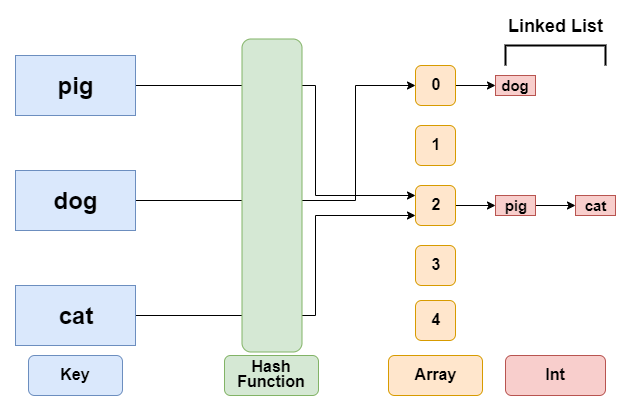

In [28]:
from IPython.display import Image
Image(filename="C:/Users/User/Desktop/hash_table.png",height = 600 , width = 500)

## 心得:
這次的作業真的簡單不少了，可能是因為之前有寫過linked list的原因，

至少沒有過跟上禮拜上上禮拜一樣，每天三四點才睡得日子，

但在丟測值的部分還是下了不少苦心，要構想到每一種狀況發生太難了，

希望在檢測的時候不會發生自己沒想到的狀況。

## 參考網站:
1. https://github.com/C-WeiYu/WeiYu/blob/master/Leetcode/class/707.Linked%20List.py

2. http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html

3. https://zh.wikipedia.org/zh-tw/%E6%95%A3%E5%88%97%E5%87%BD%E6%95%B8

4. https://leetcode.com/problems/design-hashset/

5. https://zh.wikipedia.org/zh-tw/%E6%95%A3%E5%88%97%E5%87%BD%E6%95%B8

6. https://zh.wikipedia.org/zh-tw/%E5%93%88%E5%B8%8C%E8%A1%A8